# Packages used in Iteration 4:


findspark
pyspark
matplotlib
numpy
pandas

# STEP 2 DATA UNDERSTANDING

## 2.1 Collect Initial Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# import dataset
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
from pyspark import SparkContext

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('data_understanding').getOrCreate()
df = spark.read.csv('/home/ubuntu/Iteration_4-Vevina_Liu/loanITERATION4.csv',header=True,inferSchema=True)

## 2.2 Describe the Data

In [10]:
print('Number of rows: ', df.count())
print('Number of columns: ', len(df.columns))
pd.DataFrame(df.take(5), columns=df.columns)


Number of rows:  887377
Number of columns:  74


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,None,None,None,None,None,None,None,None,None,None
1,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,None,None,None,None,None,None,None,None,None,None
2,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,C,C1,...,None,None,None,None,None,None,None,None,None,None
3,1069759,1304871,1000,1000,1000.0,36 months,16.29,35.31,D,D1,...,None,None,None,None,None,None,None,None,None,None
4,1047704,1278806,8500,8500,8500.0,36 months,11.71,281.15,B,B3,...,None,None,None,None,None,None,None,None,None,None


In [6]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- member_id: integer (nullable = true)
 |-- loan_amnt: integer (nullable = true)
 |-- funded_amnt: integer (nullable = true)
 |-- funded_amnt_inv: double (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: double (nullable = true)
 |-- installment: double (nullable = true)
 |-- grade: string (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- emp_title: string (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_inc: double (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- issue_d: string (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- pymnt_plan: string (nullable = true)
 |-- url: string (nullable = true)
 |-- desc: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- title: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- dti: dou

In [7]:
print('List of All Attributes \n\n', df.columns)

List of All Attributes 

 ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m

In [7]:
print(df.dtypes)

[('id', 'int'), ('member_id', 'int'), ('loan_amnt', 'double'), ('funded_amnt', 'double'), ('funded_amnt_inv', 'double'), ('term', 'string'), ('int_rate', 'double'), ('installment', 'double'), ('grade', 'string'), ('sub_grade', 'string'), ('emp_title', 'string'), ('emp_length', 'string'), ('home_ownership', 'string'), ('annual_inc', 'string'), ('verification_status', 'string'), ('issue_d', 'string'), ('loan_status', 'string'), ('pymnt_plan', 'string'), ('url', 'string'), ('desc', 'string'), ('purpose', 'string'), ('title', 'string'), ('zip_code', 'string'), ('addr_state', 'string'), ('dti', 'string'), ('delinq_2yrs', 'string'), ('earliest_cr_line', 'string'), ('inq_last_6mths', 'string'), ('mths_since_last_delinq', 'string'), ('mths_since_last_record', 'string'), ('open_acc', 'string'), ('pub_rec', 'string'), ('revol_bal', 'string'), ('revol_util', 'string'), ('total_acc', 'string'), ('initial_list_status', 'string'), ('out_prncp', 'string'), ('out_prncp_inv', 'string'), ('total_pymnt',

## 2.3 Explore the Data

In [11]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
id,887377,3.246513370281064E7,2.282731748863271E7,54734,68617057
member_id,887377,3.500182617194158E7,2.4113327749339722E7,70473,73544841
loan_amnt,887377,14755.275322664436,8435.462086458196,500,35000
funded_amnt,887377,14741.888312408368,8429.904150635357,500,35000
funded_amnt_inv,887377,14702.478821301673,8442.11037980163,0.0,35000.0
term,887377,None,None,36 months,60 months
int_rate,887377,13.246738071888442,4.381872065411548,5.32,28.99
installment,887377,436.71746498953945,244.1867493215962,15.67,1445.46
grade,887377,None,None,A,G


In [10]:
# categorical attributes
categorical = []
for i in df.dtypes:
    if (i[1] != 'int') & (i[1] != 'double'):
        categorical.append(i[0])
print('List of Categorical Attributes \n')
print(categorical)    

List of Categorical Attributes 

['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'verification_status_joint']


### explore the target

In [12]:
df.groupBy('loan_status').count().toPandas()

,loan_status,count
0,Fully Paid,207722
1,Default,1219
2,In Grace Period,6253
3,Does not meet the credit policy. Status:Fully ...,1988
4,Charged Off,45248
5,Late (31-120 days),11591
6,Issued,8460
7,Current,601778
8,Does not meet the credit policy. Status:Charge...,761
9,Late (16-30 days),2357


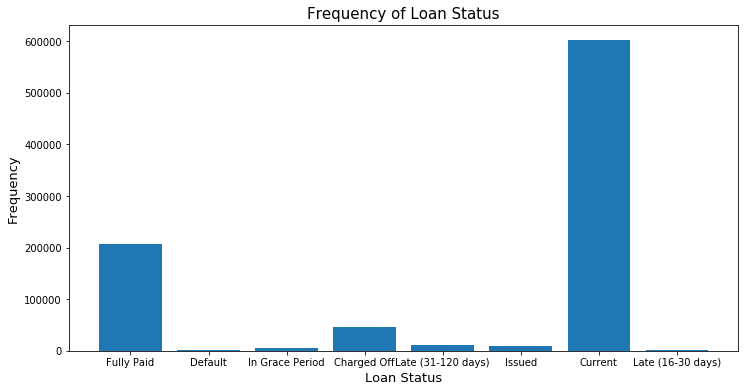

In [14]:
# distribution of the target
import matplotlib.pyplot as plt
frequency = df.groupBy('loan_status').count().collect()
x,y = [],[]
a = df.select('loan_status').distinct().count()
for i in range(a):
    if (frequency[i][0] != 'Does not meet the credit policy. Status:Fully Paid') & (frequency[i][0] != 'Does not meet the credit policy. Status:Charged Off'):
        x.append(frequency[i][0])
        y.append(frequency[i][1])

fig, pos = plt.subplots(figsize = (12,6))
pos.bar(x,y)
pos.set_title('Frequency of Loan Status', size = 15)
pos.set_xlabel('Loan Status', fontsize = 13)
pos.set_ylabel('Frequency', fontsize = 13)
plt.show()

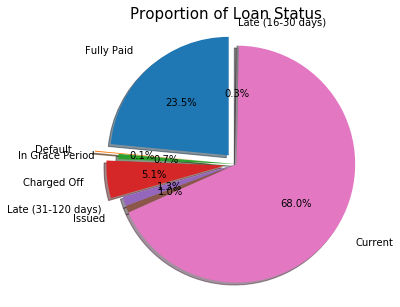

In [15]:
fig, pos = plt.subplots(figsize=(5,5))
explode = (0.1,0.2,0,0.1,0,0,0,0)
pos.pie(y, labels=x, explode=explode, autopct='%1.1f%%',shadow=True, startangle=90, labeldistance=1.2)
pos.axis('equal')
pos.set_title('Proportion of Loan Status', size = 15)
plt.show()

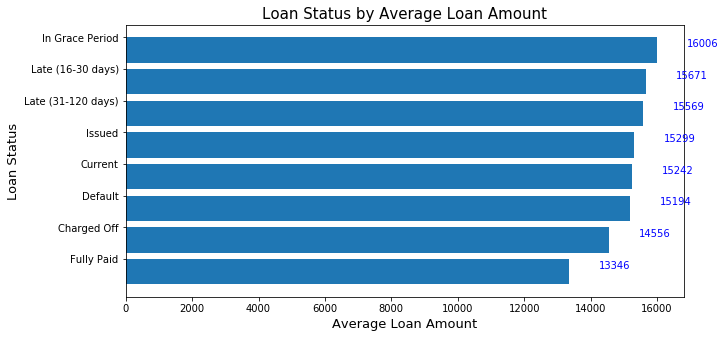

In [16]:
collect = df.groupBy('loan_status').mean().orderBy('avg(loan_amnt)').select('loan_status','avg(loan_amnt)').collect()
x,y = [],[]
a = df.select('loan_status').distinct().count()
for i in range(a):
    if (collect[i][0] != 'Does not meet the credit policy. Status:Fully Paid') & (collect[i][0] != 'Does not meet the credit policy. Status:Charged Off'):
        x.append(collect[i][0])
        y.append(collect[i][1])

fig, pos = plt.subplots(figsize=(10,5)) 
ind = np.arange(len(y))
width = 0.8
pos.barh(ind, y)
pos.set_yticks(ind+width/2)
pos.set_yticklabels(x, minor=False)
pos.set_title('Loan Status by Average Loan Amount', size = 15)
pos.set_xlabel('Average Loan Amount', fontsize = 13)
pos.set_ylabel('Loan Status', fontsize = 13)
for i, j in enumerate(y):
    pos.text(j + 900, i + .1, str(round(j)), color='blue')
plt.show()

+-------------------+------+
|verification_status| count|
+-------------------+------+
|           Verified|291070|
|    Source Verified|329558|
|       Not Verified|266749|
+-------------------+------+



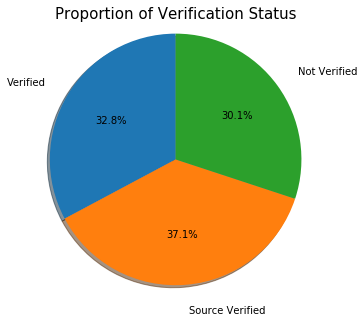

In [17]:
# verification status
df.groupBy('verification_status').count().show()

frequency = df.groupBy('verification_status').count().collect()
x,y = [],[]
a = df.select('verification_status').distinct().count()
for i in range(a):
    if (frequency[i][0] != 'Does not meet the credit policy. Status:Fully Paid') & (frequency[i][0] != 'Does not meet the credit policy. Status:Charged Off'):
        x.append(frequency[i][0])
        y.append(frequency[i][1])
        
fig, pos = plt.subplots(figsize=(5,5))
pos.pie(y, labels=x, autopct='%1.1f%%',shadow=True, startangle=90, labeldistance=1.2)
pos.axis('equal')
pos.set_title('Proportion of Verification Status', size = 15)
plt.show()

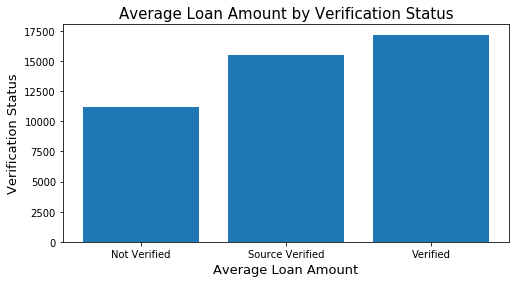

In [18]:
# visualization
collect = df.groupBy('verification_status').mean().orderBy('avg(loan_amnt)').select('verification_status','avg(loan_amnt)').collect()
x,y = [],[]
a = df.select('verification_status').distinct().count()
for i in range(a):
    x.append(collect[i][0])
    y.append(collect[i][1])

fig, pos = plt.subplots(figsize=(8,4)) 
pos.bar(x,y)
pos.set_title('Average Loan Amount by Verification Status', size = 15)
pos.set_xlabel('Average Loan Amount', fontsize = 13)
pos.set_ylabel('Verification Status', fontsize = 13)
plt.show()

In [19]:
# purpose
df.groupBy('purpose').count().sort('count').show()

+------------------+------+
|           purpose| count|
+------------------+------+
|       educational|   423|
|  renewable_energy|   575|
|           wedding|  2347|
|             house|  3707|
|          vacation|  4736|
|            moving|  5414|
|           medical|  8540|
|               car|  8863|
|    small_business| 10377|
|    major_purchase| 17277|
|             other| 42894|
|  home_improvement| 51829|
|       credit_card|206181|
|debt_consolidation|524214|
+------------------+------+



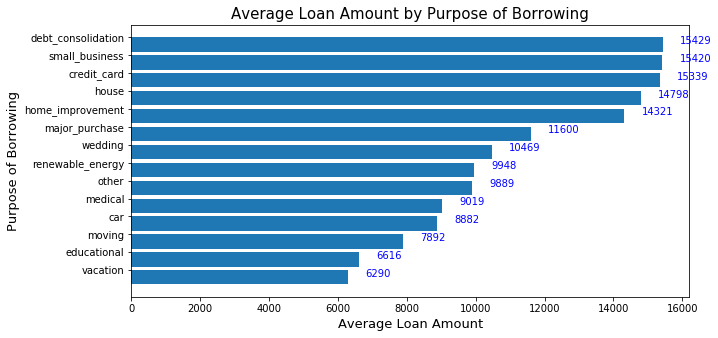

In [20]:
# average loan amount by purpose
collect = df.groupBy('purpose').mean().orderBy('avg(loan_amnt)').select('purpose','avg(loan_amnt)').collect()
x,y = [],[]
a = df.select('purpose').distinct().count()
for i in range(a):
    x.append(collect[i][0])
    y.append(collect[i][1])

fig, pos = plt.subplots(figsize=(10,5)) 
ind = np.arange(len(y))
width = 0.8
pos.barh(ind, y)
pos.set_yticks(ind+width/2)
pos.set_yticklabels(x, minor=False)
pos.set_title('Average Loan Amount by Purpose of Borrowing', size = 15)
pos.set_xlabel('Average Loan Amount', fontsize = 13)
pos.set_ylabel('Purpose of Borrowing', fontsize = 13)
for i, j in enumerate(y):
    pos.text(j + 500, i + .05, str(round(j)), color='blue')
plt.show()

+-----+------+
|grade| count|
+-----+------+
|    F| 23046|
|    E| 70705|
|    B|254535|
|    D|139541|
|    C|245859|
|    A|148202|
|    G|  5489|
+-----+------+



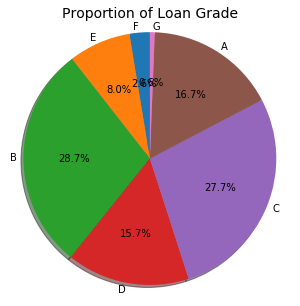

In [21]:
# grade
df.groupBy('grade').count().show()
frequency = df.groupBy('grade').count().collect()
x,y = [],[]
a = df.select('grade').distinct().count()
for i in range(a):
    if (frequency[i][0] != 'Does not meet the credit policy. Status:Fully Paid') & (frequency[i][0] != 'Does not meet the credit policy. Status:Charged Off'):
        x.append(frequency[i][0])
        y.append(frequency[i][1])
        
fig, pos = plt.subplots(figsize=(5,5))
pos.pie(y, labels=x, autopct='%1.1f%%',shadow=True, startangle=90, labeldistance=1.05)
pos.axis('equal')
pos.set_title('Proportion of Loan Grade', size = 14)
plt.show()

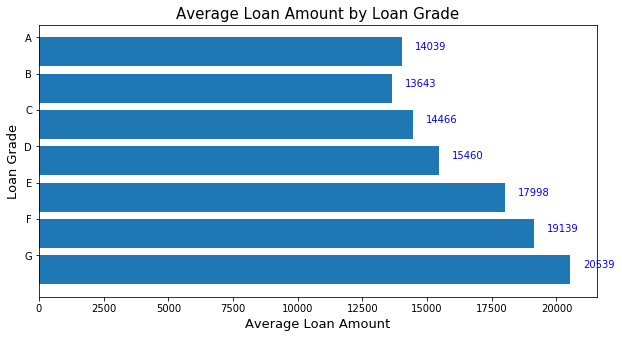

In [22]:
# grade
# Average loan amount by grade
collect = df.groupBy('grade').mean().orderBy('grade', ascending = False).select('grade','avg(loan_amnt)').collect()
x,y = [],[]
a = df.select('grade').distinct().count()
for i in range(a):
    x.append(collect[i][0])
    y.append(collect[i][1])

fig, pos = plt.subplots(figsize=(10,5)) 
ind = np.arange(len(y))
width = 0.8
pos.barh(ind, y)
pos.set_yticks(ind + width/2)
pos.set_yticklabels(x, minor = False)
pos.set_title('Average Loan Amount by Loan Grade', size = 15)
pos.set_xlabel('Average Loan Amount', fontsize = 13)
pos.set_ylabel('Loan Grade', fontsize = 13)
for i, j in enumerate(y):
    pos.text(j + 500, i + .05, str(round(j)), color='blue')
plt.show()

In [23]:
# employment length
df.groupBy('emp_length').count().sort('count').show()

+----------+------+
|emp_length| count|
+----------+------+
|   9 years| 34656|
|   6 years| 42950|
|   8 years| 43955|
|   7 years| 44594|
|      null| 44825|
|   4 years| 52529|
|   5 years| 55704|
|    1 year| 57095|
|   3 years| 70025|
|  < 1 year| 70605|
|   2 years| 78870|
| 10+ years|291569|
+----------+------+



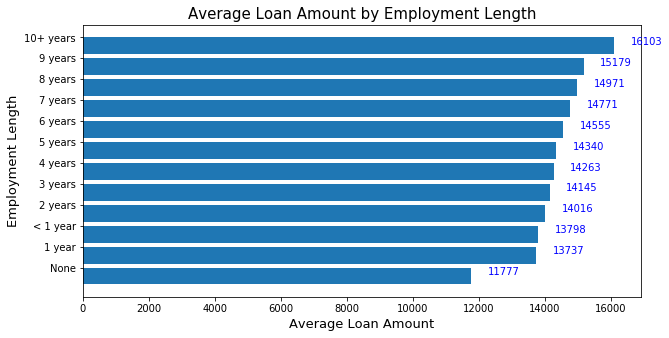

In [24]:
collect = df.groupBy('emp_length').mean().orderBy('avg(loan_amnt)').select('emp_length','avg(loan_amnt)').collect()
x,y = [],[]
a = df.select('emp_length').distinct().count()
for i in range(a):
    x.append(collect[i][0])
    y.append(collect[i][1])

fig, pos = plt.subplots(figsize=(10,5)) 
ind = np.arange(len(y))
width = 0.8
pos.barh(ind, y)
pos.set_yticks(ind + width/2)
pos.set_yticklabels(x, minor = False)
pos.set_title('Average Loan Amount by Employment Length', size = 15)
pos.set_xlabel('Average Loan Amount', fontsize = 13)
pos.set_ylabel('Employment Length', fontsize = 13)
for i, j in enumerate(y):
    pos.text(j + 500, i + .05, str(round(j)), color='blue')
plt.show()


+--------------+------+
|home_ownership| count|
+--------------+------+
|           OWN| 87469|
|          RENT|356116|
|      MORTGAGE|443557|
|           ANY|     3|
|         OTHER|   182|
|          NONE|    50|
+--------------+------+



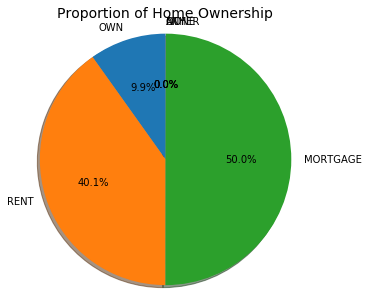

In [25]:
# home ownership
df.groupBy('home_ownership').count().show()

frequency = df.groupBy('home_ownership').count().collect()
x,y = [],[]
a = df.select('home_ownership').distinct().count()
for i in range(a):
    if (frequency[i][0] != 'Does not meet the credit policy. Status:Fully Paid') & (frequency[i][0] != 'Does not meet the credit policy. Status:Charged Off'):
        x.append(frequency[i][0])
        y.append(frequency[i][1])
        
fig, pos = plt.subplots(figsize=(5,5))
pos.pie(y, labels=x, autopct='%1.1f%%',shadow=True, startangle=90, labeldistance=1.1)
pos.axis('equal')
pos.set_title('Proportion of Home Ownership', size = 14)
plt.show()

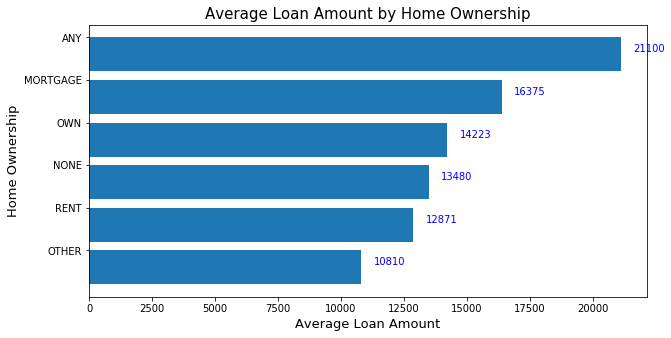

In [26]:
collect = df.groupBy('home_ownership').mean().orderBy('avg(loan_amnt)').select('home_ownership','avg(loan_amnt)').collect()
x,y = [],[]
a = df.select('home_ownership').distinct().count()
for i in range(a):
    x.append(collect[i][0])
    y.append(collect[i][1])

fig, pos = plt.subplots(figsize=(10,5)) 
ind = np.arange(len(y))
width = 0.8
pos.barh(ind, y)
pos.set_yticks(ind + width/2)
pos.set_yticklabels(x, minor = False)
pos.set_title('Average Loan Amount by Home Ownership', size = 15)
pos.set_xlabel('Average Loan Amount', fontsize = 13)
pos.set_ylabel('Home Ownership', fontsize = 13)
for i, j in enumerate(y):
    pos.text(j + 500, i + .05, str(round(j)), color='blue')
plt.show()


In [27]:
# district
print("Top 10 States")
df.groupBy('addr_state').count().sort('count', ascending=False).show(10)

Top 10 States
+----------+------+
|addr_state| count|
+----------+------+
|        CA|129515|
|        NY| 74086|
|        TX| 71138|
|        FL| 60935|
|        IL| 35476|
|        NJ| 33256|
|        PA| 31393|
|        OH| 29631|
|        GA| 29085|
|        VA| 26255|
+----------+------+
only showing top 10 rows



In [28]:
df.groupBy('addr_state').mean().orderBy('avg(loan_amnt)',ascending=False).select('addr_state','avg(loan_amnt)').show(10)

+----------+------------------+
|addr_state|    avg(loan_amnt)|
+----------+------------------+
|        AK|16770.090702947848|
|        MA|15679.331568979751|
|        VA|15662.618548847839|
|        TX|15591.239211110798|
|        ND| 15547.59916492693|
|        NJ| 15493.53500120279|
|        ME|15489.190476190477|
|        MD|15475.092720270077|
|        WY|15321.881163708087|
|        HI| 15211.44420131291|
+----------+------------------+
only showing top 10 rows



+----------+------+
|      term| count|
+----------+------+
| 36 months|621124|
| 60 months|266253|
+----------+------+



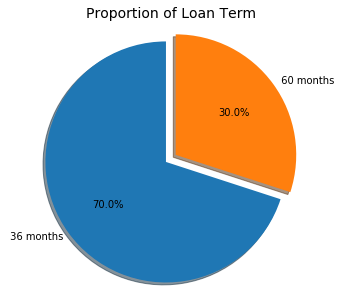

In [29]:
# Loan term
df.groupBy('term').count().show()
frequency = df.groupBy('term').count().collect()
x,y = [],[]
a = df.select('term').distinct().count()
for i in range(a):
    if (frequency[i][0] != 'Does not meet the credit policy. Status:Fully Paid') & (frequency[i][0] != 'Does not meet the credit policy. Status:Charged Off'):
        x.append(frequency[i][0])
        y.append(frequency[i][1])
        
fig, pos = plt.subplots(figsize=(5,5))
explode = (0.1,0)
pos.pie(y, labels=x, explode=explode, autopct='%1.1f%%',shadow=True, startangle=90, labeldistance=1.05)
pos.axis('equal')
pos.set_title('Proportion of Loan Term', size = 14)
plt.show()

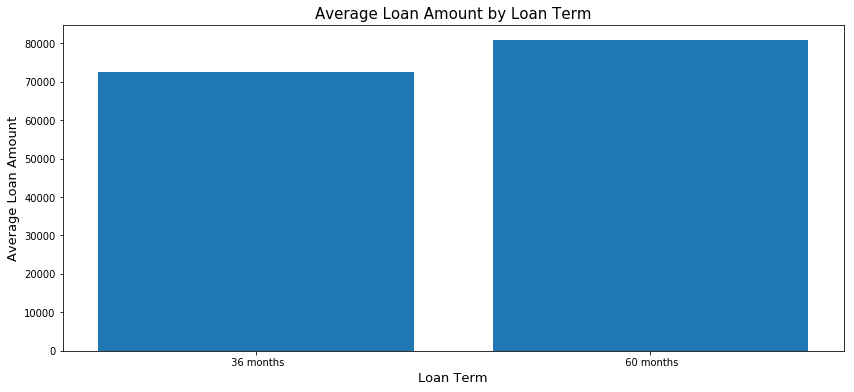

In [30]:
collect = df.groupBy('term').mean().orderBy('avg(annual_inc)').select('term','avg(annual_inc)').collect()
x,y = [],[]
a = df.select('term').distinct().count()
for i in range(a):
    x.append(collect[i][0])
    y.append(collect[i][1])

fig, pos = plt.subplots(figsize = (14,6))
pos.bar(x,y)
pos.set_title('Average Loan Amount by Loan Term', size = 15)
pos.set_xlabel('Loan Term', fontsize = 13)
pos.set_ylabel('Average Loan Amount', fontsize = 13)
plt.show() 

## 2.4 Verify the Data Quality

### Missing Values

In [3]:
# print missing values
for c in df.columns:
    a = df.where(df[c].isNull()).count()
    if a != 0:
        print('{:<25} {:^6}'.format(c,a))

emp_title                 51457 
emp_length                44825 
annual_inc                  4   
desc                      761349
title                      151  
delinq_2yrs                 29  
earliest_cr_line            29  
inq_last_6mths              29  
mths_since_last_delinq    454311
mths_since_last_record    750324
open_acc                    29  
pub_rec                     29  
revol_util                 502  
total_acc                   29  
last_pymnt_d              17659 
next_pymnt_d              252970
last_credit_pull_d          53  
collections_12_mths_ex_med  145  
mths_since_last_major_derog 665674
annual_inc_joint          886866
dti_joint                 886868
verification_status_joint 886866
acc_now_delinq              29  
tot_coll_amt              70275 
tot_cur_bal               70275 
open_acc_6m               866005
open_il_6m                866005
open_il_12m               866005
open_il_24m               866005
mths_since_rcnt_il        866567
total_b

### Outliers

In [5]:
outliers = {}
print('{:<30} {:^6}'.format('Attributes', 'NO. of Outliers'))
for i in df.dtypes:
    if i[1] != 'string':
        dfdrop = df.select(i[0]).na.drop()
        q1 = dfdrop.approxQuantile(col = i[0], probabilities = [0.25], relativeError = 0)[0]
        q3 = dfdrop.approxQuantile(col = i[0], probabilities = [0.75], relativeError = 0)[0]
        upper = q3 + (q3 - q1) * 1.5 
        lower = q1 - (q3 - q1) * 1.5 
        a = df.where(df[i[0]] < lower).count() + df.where(df[i[0]] > upper).count()
        print('{:<30} {:^6}'.format(i[0],str(a)))
        outliers[i[0]] = a

Attributes                     NO. of Outliers
id                               0   
member_id                        0   
loan_amnt                        0   
funded_amnt                      0   
funded_amnt_inv                  0   
int_rate                        6308 
installment                    23151 
annual_inc                     39719 
dti                              81  
delinq_2yrs                    170388
inq_last_6mths                 53834 
mths_since_last_delinq          158  
mths_since_last_record           0   
open_acc                       27477 
pub_rec                        135778
revol_bal                      48649 
revol_util                       51  
total_acc                      18232 
out_prncp                       3363 
out_prncp_inv                   3311 
total_pymnt                    46324 
total_pymnt_inv                46390 
total_rec_prncp                56944 
total_rec_int                  63835 
total_rec_late_fee             12517 
rec